# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# Downtown San Diego Homeless Sleepers
`sandiegodata.org-dowtown_homeless-1` Last Update: 2019-09-27T22:15:43

_Five years of monthly geographic positions for homeless sleepers in Downtown San Diego_


This dataset provides geographic locations for homeless sleepers in Downtown San Diego, as counted by enumerators from the Downtown San Diego Partnership. These counts have been done monthly since 2012, and this dataset provides counts since 2014. 

<center><a href="https://i2.wp.com/www.sandiegodata.org/wp-content/uploads/sites/19/2019/09/Homeless-Sleepers.png?ssl=1"><img src="https://i2.wp.com/www.sandiegodata.org/wp-content/uploads/sites/19/2019/09/Homeless-Sleepers.png?ssl=1" width="400px"></a></center>


The count is done on paper maps with handwritten count marks. The San Diego
Regional Data Library's [Downton Homelessness
project](http://downtown-homelessness.sandiegodata.org/) converted these
scanned count maps using a [web based image annotation
tool](http://www.robots.ox.ac.uk/~vgg/software/via/).


## Caveats


* The ``total_count`` often does not match the sum of counts on the map. These sums were made by hand, buy the enumerator who made the counts, so there are occasional arithmetic errors.  
* There are many instances of missing values for ``rain`` or ``temp``
* Some dates include the day of the month, but many don't These dates have a day of month of 1


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [homeless_counts](data/homeless_counts.csv)**. Counts of homeless sleepers in Downtown San Diego, 2014 to mid 2018.

## References
<ul><li> <strong>counts</string>, <em>metapack+http://library.metatab.org/sandiegodata.org-downtown_homeless-source-1.csv#counts</em>. Final homeless sleeper counts</li><li> <strong>files</string>, <em>metapack+http://library.metatab.org/sandiegodata.org-downtown_homeless-source-1.csv#files</em>. Final file annotations, including total counts, temperature and weather.</li><li> <strong>blocks</string>, <em>shape+https://www2.census.gov/geo/pvs/tiger2010st/06_California/06073/tl_2010_06073_tabblock10.zip</em>. 2010 Census blocks for San Diego County</li><ul>

In [3]:
resource_name='homeless_counts'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
neighborhood,string,"Neighborhood, from the label on the source map"
date,datetime,"Date of the observation. Many dates have no know day of month; for these dates, the day of month is set to 1"
type,string,"Type of sleeper: individual, vehicle or structure"
temp,integer,"Temperature, if it was written on the source map"
rain,string,"Rain or clear, if it was written on the source map"
geoid,string,"Census geoid for the 2010 Census block the observation is in, in ACS format"
x,number,"X geographic position, in California State Plane 6, EPSG:2230"
y,number,"Y geographic position, in California State Plane 6, EPSG:2230"
geometry,string,"Geographic position of observation, in Lat/Lon, EPSG:4326"


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,neighborhood,date,type,temp,rain,geoid,x,y,geometry
0,east_village,2015-02-26,individual,NaN,clear,10100US060730054004017,6.282705e+06,1.839576e+06,"POLYGON ((-117.157385 32.710435, -117.157386 3..."
1,East Village South,2017-08-31,individual,NaN,NaN,10100US060730054004017,6.282685e+06,1.839585e+06,"POLYGON ((-117.157385 32.710435, -117.157386 3..."
2,East Village South,2017-08-31,individual,NaN,NaN,10100US060730054004017,6.282685e+06,1.839585e+06,"POLYGON ((-117.157385 32.710435, -117.157386 3..."
3,East Village South,2017-10-23,individual,66.0,clear,10100US060730054004017,6.282745e+06,1.839588e+06,"POLYGON ((-117.157385 32.710435, -117.157386 3..."
4,east_village,2015-03-26,individual,NaN,clear,10100US060730054004017,6.282740e+06,1.839639e+06,"POLYGON ((-117.157385 32.710435, -117.157386 3..."


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,1
number,3
other,5


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41851 entries, 0 to 41850
Data columns (total 1 columns):
date    41581 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 327.0 KB


None

,count,unique,top,freq,first,last
date,41581,97,2016-12-29 00:00:00,1414,2014-01-01 00:00:00,2019-02-28 00:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41851 entries, 0 to 41850
Data columns (total 3 columns):
temp    15592 non-null float64
x       41851 non-null float64
y       41851 non-null float64
dtypes: float64(3)
memory usage: 981.0 KB


None

,count,mean,std,min,25%,50%,75%,max
temp,15592.0,5.705875e+01,7.005831,4.200000e+01,5.200000e+01,5.800000e+01,6.300000e+01,6.700000e+01
x,41851.0,6.283187e+06,1798.224242,6.278185e+06,6.281651e+06,6.283747e+06,6.284851e+06,6.285441e+06
y,41851.0,1.840169e+06,1471.006000,1.837472e+06,1.838950e+06,1.839765e+06,1.841285e+06,1.844135e+06


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


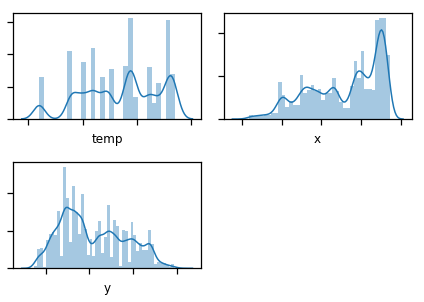

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

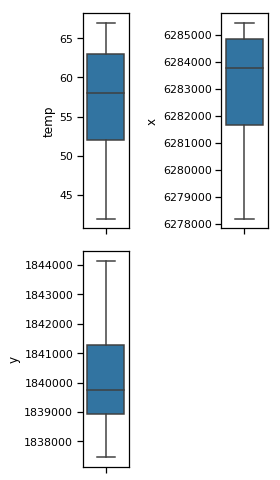

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

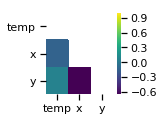

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41851 entries, 0 to 41850
Data columns (total 5 columns):
neighborhood    41833 non-null object
type            41851 non-null object
rain            18447 non-null object
geoid           41851 non-null object
geometry        41851 non-null object
dtypes: object(5)
memory usage: 1.6+ MB


None

,count,unique,top,freq
neighborhood,41833,8,east_village,22124
type,41851,3,individual,39512
rain,18447,2,clear,16155
geoid,41851,287,10100US060730051001013,2321
geometry,41851,287,"POLYGON ((-117.148533 32.706671, -117.148531 3...",2321


# Nulls


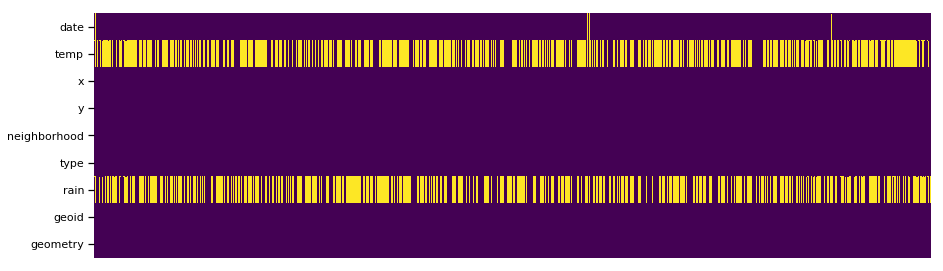

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )